In [321]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## 1 - Load Dataset

In [100]:
DF = pd.read_excel('./datasets/200602_EMR_V4_OG.xlsx')
DF.shape

(3257, 178)

In [279]:
def df_preprocessing(df, col_name_idx, col_start_idx, row_start_idx):
    new = df.iloc[row_start_idx:, col_start_idx:]
    new.columns = df.iloc[col_name_idx, col_start_idx:]
    print('## Complete dataframe preprocessing ##')
    print('Before : {} / After : {}'.format(df.shape, new.shape))
    return new


def get_priority_cols(df, p_cols):
    new = df[p_cols]
    print('## Complete get priority columns ##')
    print('Before : {} / After : {}'.format(df.shape, new.shape))
    return new


priority_cols = ['Age', 'Sex', 'ASA', 'BMI', 'DM_history',
                 'Pulmonary_disease', 'Liver_disease', 'Heart_disease', 'Kidney_disease', 'Smoking_history',
                 'Prior_Dx_cancer', 'Family_history_cancer', 'Initial_CEA', 'Hereditary_colorectal_tumor', 'Perforation',
                 'Obstruction', 'Emergency', 'Intraoperative_tumor_location', 'Location_of_rectal_cancer', 'Radicality',
                 'Tumor_location_pathology', 'Histologic_type', 'pT', 'LVI', 'PNI',
                 'Distal resection margin', 'Radial margin', 'pN', 'Harvested_LN', 'Positive_LN',
                 'pM', 'pTNM', 'MSI_status', 'K-ras', 'N-ras',
                 'BRAF', 'Early_Complication', 'Postop_Chemotherapy', 'Postop_Chemo_Regimen', 'Last_Follow_Up_Date',
                 'Survival_Status', 'Recurrence', 'Recurrence_Type']


In [280]:
df = df_preprocessing(DF, col_name_idx=1, col_start_idx=4, row_start_idx=4)    
df = get_priority_cols(df, priority_cols)

## Complete dataframe preprocessing ##
Before : (3257, 178) / After : (3253, 174)
## Complete get priority columns ##
Before : (3253, 174) / After : (3253, 43)


## 2 - Feature Selection

In [281]:
def drop_missing_features(df):
    drop_features = [c for c in df.columns if df[c].isnull().sum() > 500 and c != 'Postop_Chemo_Regimen']
    new = df.drop(drop_features, axis = 1)
    print('### Has been dropped : {} ###'.format(drop_features))
    print('Before : {} / After : {}'.format(df.shape, new.shape))
    return new


def drop_na_rows(df):
    new = df.dropna()
    print(' ')
    print('### Drop NA instances ###')
    print('Before : {} / After : {}'.format(df.shape, new.shape))
    return new

In [282]:
df.columns

Index(['Age', 'Sex', 'ASA', 'BMI', 'DM_history', 'Pulmonary_disease',
       'Liver_disease', 'Heart_disease', 'Kidney_disease', 'Smoking_history',
       'Prior_Dx_cancer', 'Family_history_cancer', 'Initial_CEA',
       'Hereditary_colorectal_tumor', 'Perforation', 'Obstruction',
       'Emergency', 'Intraoperative_tumor_location',
       'Location_of_rectal_cancer', 'Radicality', 'Tumor_location_pathology',
       'Histologic_type', 'pT', 'LVI', 'PNI', 'Distal resection margin',
       'Radial margin', 'pN', 'Harvested_LN', 'Positive_LN', 'pM', 'pTNM',
       'MSI_status', 'K-ras', 'N-ras', 'BRAF', 'Early_Complication',
       'Postop_Chemotherapy', 'Postop_Chemo_Regimen', 'Last_Follow_Up_Date',
       'Survival_Status', 'Recurrence', 'Recurrence_Type'],
      dtype='object', name=1)

**Delete unnecessary columns**
* Datetime
* Survival Status

In [283]:
delete_cols =['Survival_Status', 'Last_Follow_Up_Date'] 
df = df.drop(delete_cols, axis=1)

In [284]:
df = drop_missing_features(df)
df = drop_na_rows(df)

### Has been dropped : ['Family_history_cancer', 'Location_of_rectal_cancer', 'Radicality', 'MSI_status', 'Recurrence_Type'] ###
Before : (3253, 41) / After : (3253, 36)
 
### Drop NA instances ###
Before : (3253, 36) / After : (1795, 36)


### Class Distibution
1. 5-FU/LV
2. XELODA
3. FOLFOX
4. XELOX
5. FOLFIRI
6. ERBITUX, Avastin (표적 치료제)

## Define columns type and preprocessing
* Normalization
* One-hot Encoding

In [322]:
target = 'Postop_Chemo_Regimen'
df[target].value_counts()
numerical = ['Age', 'BMI', 'Initial_CEA', 'Harvested_LN', 'Positive_LN']
categorical = [nc for nc in df.columns if nc not in numerical and nc != target]
categorical

['Sex',
 'ASA',
 'DM_history',
 'Pulmonary_disease',
 'Liver_disease',
 'Heart_disease',
 'Kidney_disease',
 'Smoking_history',
 'Prior_Dx_cancer',
 'Hereditary_colorectal_tumor',
 'Perforation',
 'Obstruction',
 'Emergency',
 'Intraoperative_tumor_location',
 'Tumor_location_pathology',
 'Histologic_type',
 'pT',
 'LVI',
 'PNI',
 'Distal resection margin',
 'Radial margin',
 'pN',
 'pM',
 'pTNM',
 'K-ras',
 'N-ras',
 'BRAF',
 'Early_Complication',
 'Postop_Chemotherapy',
 'Recurrence']

**Data Normalization**

In [287]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


1,Age,Sex,ASA,BMI,DM_history,Pulmonary_disease,Liver_disease,Heart_disease,Kidney_disease,Smoking_history,...,Positive_LN,pM,pTNM,K-ras,N-ras,BRAF,Early_Complication,Postop_Chemotherapy,Postop_Chemo_Regimen,Recurrence
4,0.810811,2,3,0.0986172,0,0,0,0,0,2,...,0.00010001,1,32,1,1,1,0,1,1,1
7,0.756757,1,3,0.339156,1,0,0,0,0,2,...,0.00010001,1,32,1,1,1,0,1,1,1
8,0.756757,1,2,0.264556,0,0,0,0,0,2,...,0.00010001,1,32,1,1,1,0,1,1,0
9,0.567568,2,2,0.527656,0,0,0,1,0,0,...,0,1,21,1,1,1,0,1,1,0
12,0.702703,1,2,0.131732,0,0,0,0,0,0,...,0,1,21,1,1,1,0,1,1,0


In [288]:
def split_target_feature(df, target_name):
    target = df[target_name].astype(str)
    new = df.drop([target_name], axis=1)
    print('Before : {} / After : {}'.format(df.shape, new.shape))
    print('Target Shape : {}'.format(target.shape))
    return new, target

X, Y = split_target_feature(df, target)
Y = pd.get_dummies(Y)

Before : (1795, 36) / After : (1795, 35)
Target Shape : (1795,)


In [289]:
df.columns

Index(['Age', 'Sex', 'ASA', 'BMI', 'DM_history', 'Pulmonary_disease',
       'Liver_disease', 'Heart_disease', 'Kidney_disease', 'Smoking_history',
       'Prior_Dx_cancer', 'Initial_CEA', 'Hereditary_colorectal_tumor',
       'Perforation', 'Obstruction', 'Emergency',
       'Intraoperative_tumor_location', 'Tumor_location_pathology',
       'Histologic_type', 'pT', 'LVI', 'PNI', 'Distal resection margin',
       'Radial margin', 'pN', 'Harvested_LN', 'Positive_LN', 'pM', 'pTNM',
       'K-ras', 'N-ras', 'BRAF', 'Early_Complication', 'Postop_Chemotherapy',
       'Postop_Chemo_Regimen', 'Recurrence'],
      dtype='object', name=1)

**One-hot Encoding**

In [290]:
def categorical_preprocessing(df, categorical_cols, onehot_cols):
    for c in categorical_cols:
        df[c] = df[c].astype(str)
    new = pd.get_dummies(df, columns=onehot_cols)
    print('Before : {} / After : {}'.format(df.shape, new.shape))
    return new

In [291]:
not_onehot_features = ['Sex', 'DM_history', 'Pulmonary_disease', 'Liver_disease', 'Hereditary_colorectal_tumor',
                   'Perforation', 'Obstruction', 'Emergency', 'Early_Complication', 'Recurrence']

onehot_features = [c for c in categorical if c not in not_onehot_features]

In [292]:
X = categorical_preprocessing(X, categorical, onehot_features)

Before : (1795, 35) / After : (1795, 208)


In [293]:
X.head()

,Age,Sex,BMI,DM_history,Pulmonary_disease,Liver_disease,Initial_CEA,Hereditary_colorectal_tumor,Perforation,Obstruction,...,K-ras_21,K-ras_22,N-ras_1,N-ras_21,N-ras_22,BRAF_1,BRAF_21,BRAF_22,Postop_Chemotherapy_0,Postop_Chemotherapy_1
4,0.810811,2,0.0986172,0,0,0,0.000384039,0,0,0,...,0,0,1,0,0,1,0,0,0,1
7,0.756757,1,0.339156,1,0,0,4.90049e-05,0,0,0,...,0,0,1,0,0,1,0,0,0,1
8,0.756757,1,0.264556,0,0,0,0.000416042,0,0,0,...,0,0,1,0,0,1,0,0,0,1
9,0.567568,2,0.527656,0,0,0,2.0002e-06,0,0,0,...,0,0,1,0,0,1,0,0,0,1
12,0.702703,1,0.131732,0,0,0,4.90049e-05,0,0,0,...,0,0,1,0,0,1,0,0,0,1


## Train / Test Split

In [294]:
import keras
from sklearn.model_selection import train_test_split

In [295]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1256, 208) (539, 208) (1256, 6) (539, 6)


## Model Architecture

In [296]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers import Flatten, Convolution2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [297]:
def baseline_model(input_dim):
    model = Sequential()
    
    model.add(Dense(256, input_dim=input_dim, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    return model

## Model Training

In [298]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model = baseline_model(x_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', recall_m, precision_m, f1_m])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128)
print('\nAccuracy: {:.4f}'.format(model.evaluate(x_test, y_test)[1]))

Train on 1256 samples, validate on 539 samples
Epoch 1/100
1256/1256 [==============================] - 4s 3ms/step - loss: 2.9751 - acc: 0.3137 - recall_m: 0.0756 - precision_m: 0.2483 - f1_m: 0.1092 - val_loss: 2.1923 - val_acc: 0.5009 - val_recall_m: 0.0557 - val_precision_m: 0.4729 - val_f1_m: 0.0985
Epoch 2/100
1256/1256 [==============================] - 1s 482us/step - loss: 2.4426 - acc: 0.3766 - recall_m: 0.1290 - precision_m: 0.3967 - f1_m: 0.1943 - val_loss: 2.1618 - val_acc: 0.5009 - val_recall_m: 0.0557 - val_precision_m: 0.4729 - val_f1_m: 0.0985
Epoch 3/100
1256/1256 [==============================] - 1s 495us/step - loss: 2.2661 - acc: 0.4180 - recall_m: 0.1521 - precision_m: 0.4069 - f1_m: 0.2191 - val_loss: 2.1161 - val_acc: 0.5009 - val_recall_m: 0.0557 - val_precision_m: 0.4729 - val_f1_m: 0.0985
Epoch 4/100
1256/1256 [==============================] - 1s 490us/step - loss: 2.6365 - acc: 0.3535 - recall_m: 0.1768 - precision_m: 0.4221 - f1_m: 0.2475 - val_loss: 2.60

1256/1256 [==============================] - 1s 493us/step - loss: 1.0898 - acc: 0.8933 - recall_m: 0.8869 - precision_m: 0.8998 - f1_m: 0.8933 - val_loss: 3.4292 - val_acc: 0.6122 - val_recall_m: 0.5993 - val_precision_m: 0.6138 - val_f1_m: 0.6064
Epoch 64/100
1256/1256 [==============================] - 1s 473us/step - loss: 1.0540 - acc: 0.9068 - recall_m: 0.8989 - precision_m: 0.9120 - f1_m: 0.9054 - val_loss: 3.7806 - val_acc: 0.6067 - val_recall_m: 0.6030 - val_precision_m: 0.6157 - val_f1_m: 0.6092
Epoch 65/100
1256/1256 [==============================] - 1s 492us/step - loss: 1.1004 - acc: 0.9068 - recall_m: 0.9045 - precision_m: 0.9095 - f1_m: 0.9070 - val_loss: 3.8847 - val_acc: 0.6234 - val_recall_m: 0.6141 - val_precision_m: 0.6234 - val_f1_m: 0.6187
Epoch 66/100
1256/1256 [==============================] - 1s 484us/step - loss: 1.0865 - acc: 0.9005 - recall_m: 0.9005 - precision_m: 0.9026 - f1_m: 0.9015 - val_loss: 3.7264 - val_acc: 0.6234 - val_recall_m: 0.6197 - val_prec

## Evaluation

In [299]:
def getLossGraph(length, t_loss, v_loss):
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Test-set Loss")
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    
def getROCCurve(n_classes, y_test, y_pred, lw):
    y_pred = np.asarray(y_pred)
    y_test = np.asarray(y_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
#     # Plot all ROC curves
#     plt.figure()
#     plt.plot(fpr["micro"], tpr["micro"],
#              label='micro-average ROC curve (area = {0:0.2f})'
#                    ''.format(roc_auc["micro"]),
#              color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

## Case 1 - 원본 데이터 셋 사용

In [300]:
score = model.evaluate(x_test, y_test)
score_idx = ['Loss', 'ACC', 'Recall', 'Precision', 'F1']
for idx, s in zip(score_idx, score):
    print('{} : {}'.format(idx, s))

539/539 [==============================] - 0s 222us/step
Loss : 3.722466920435097
ACC : 0.6400742106181129
Recall : 0.6289424852006732
Precision : 0.6458156442819146
F1 : 0.637125805158562


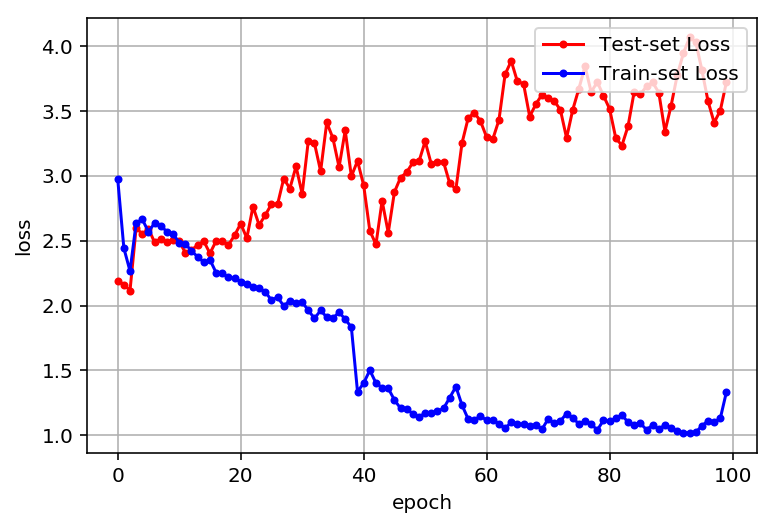

In [301]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

getLossGraph(x_len, y_loss, y_vloss)

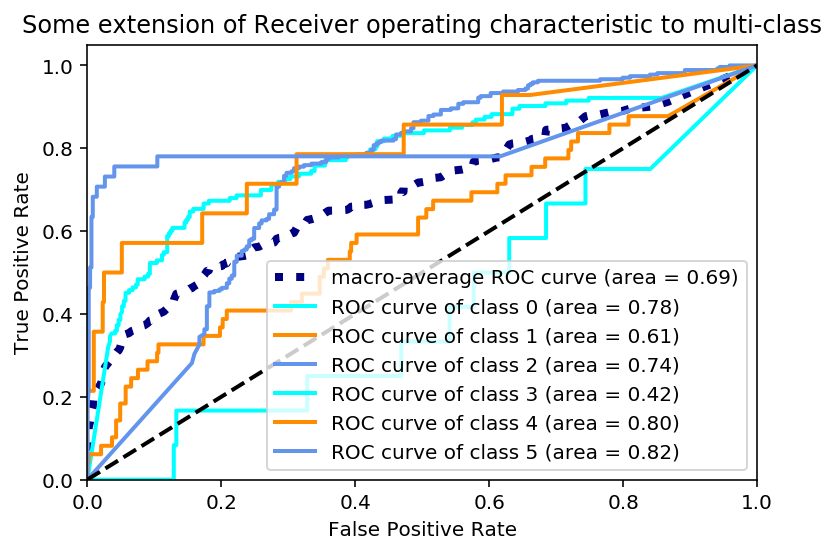

In [302]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from itertools import cycle

y_pred = model.predict(x_test)
getROCCurve(6, y_test, y_pred, 2)

In [318]:

def bootstrap_oversampling(df, n_sampling, target, sampling_target):
    samples = resample(df, n_samples=n_sampling)    
    for chemo in sampling_target:
        new = pd.concat([df, samples[samples[target] == chemo]])
    return new

1,Age,Sex,ASA,BMI,DM_history,Pulmonary_disease,Liver_disease,Heart_disease,Kidney_disease,Smoking_history,...,Positive_LN,pM,pTNM,K-ras,N-ras,BRAF,Early_Complication,Postop_Chemotherapy,Postop_Chemo_Regimen,Recurrence
954,0.824324,1,2,0.0898836,0,0,0,0,0,0,...,0,21,4,21,1,1,0,1,4,0
2483,0.689189,1,2,0.328967,0,1,0,"1, 3",0,0,...,0.00010001,1,32,21,21,1,0,1,4,0
1799,0.594595,1,1,0.309316,0,0,0,0,0,0,...,0,1,21,21,1,1,0,1,4,0
1972,0.756757,1,2,0.411936,0,0,0,0,0,0,...,0.00010001,1,32,22,1,1,0,1,4,1
2652,0.810811,1,9999,0.385371,0,0,0,0,0,0,...,0.00040004,1,32,22,21,21,1,1,4,0
2363,0.675676,1,2,0.351892,0,0,0,1,0,1,...,0.00030003,1,32,1,1,1,0,1,4,1
1984,0.472973,1,2,0.705604,1,0,0,"1, 2",0,0,...,0.00070007,1,33,21,1,1,0,1,4,0
2252,0.418919,1,1,0.485808,0,0,0,0,0,1,...,0,1,21,21,1,1,0,1,4,0
339,0.77027,2,2,0.431223,0,0,0,1,0,2,...,0.00110011,1,33,1,1,1,0,1,4,1
954,0.824324,1,2,0.0898836,0,0,0,0,0,0,...,0,21,4,21,1,1,0,1,4,0
